# Importing Libraries

In [ ]:
#for numpy
!pip install numpy

In [ ]:
#for pandas
!pip install pandas

In [ ]:
#for sklearn
!pip install sklearn

In [ ]:
#for catboost
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier

## Storing data in variables as DataFrames

In [ ]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [ ]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [ ]:
pharma_data.isna().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [ ]:
#Number unique values in each column
for i in pharma_data.columns:
    print('Number of unique values in',i,"column is:\n",len(pharma_data[i].unique()))

Number of unique values in ID_Patient_Care_Situation column is:
 23097
Number of unique values in Diagnosed_Condition column is:
 53
Number of unique values in Patient_ID column is:
 10570
Number of unique values in Treated_with_drugs column is:
 33
Number of unique values in Patient_Age column is:
 78
Number of unique values in Patient_Body_Mass_Index column is:
 10570
Number of unique values in Patient_Smoker column is:
 3
Number of unique values in Patient_Rural_Urban column is:
 2
Number of unique values in Patient_mental_condition column is:
 1
Number of unique values in A column is:
 3
Number of unique values in B column is:
 3
Number of unique values in C column is:
 3
Number of unique values in D column is:
 3
Number of unique values in E column is:
 3
Number of unique values in F column is:
 3
Number of unique values in Z column is:
 3
Number of unique values in Number_of_prev_cond column is:
 6
Number of unique values in Survived_1_year column is:
 2


In [ ]:
pharma_data.shape

(23097, 18)

# Data Preprocessing

## Dropping unnecessary columns

### As there are all unique values in 'ID_Patient_Care_Situation' column it is not not helpful for predicting whether the patient survives or not

In [ ]:
data = pharma_data.drop('ID_Patient_Care_Situation',axis=1)
test_data = test_new.drop('ID_Patient_Care_Situation',axis=1)

### As there are all unique values in 'Patient_ID' column it is not not helpful for predicting whether the patient survives or not

In [ ]:
data = data.drop('Patient_ID',axis=1)
test_data = test_data.drop('Patient_ID',axis=1)

### As there is a same value in 'Patient_mental_condition' column it will not be helpful to predict whether patient survives or not

In [ ]:
data = data.drop('Patient_mental_condition',axis=1)
test_data = test_data.drop('Patient_mental_condition',axis=1)

## Splitting the treated with drugs column

In [ ]:
drug_data=[i.split() for i in data['Treated_with_drugs'].dropna()]

In [ ]:
temp=[]
for i in drug_data:
    temp+=i
drug_data = temp

In [ ]:
Counter(drug_data)

Counter({'DX1': 4168,
         'DX2': 4209,
         'DX3': 4154,
         'DX4': 4117,
         'DX5': 4177,
         'DX6': 8606})

### Giving the NA values in treated_with_drugs column value DX6 ( mode of the data )

In [ ]:
data.Treated_with_drugs[data.Treated_with_drugs.isna()] = 'DX6'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
drugs = {}
for j in Counter(drug_data).keys():
    drugs[j] = [1 if (j in i) else 0 for i in data.Treated_with_drugs]
drugs_test = {}
for j in Counter(drug_data).keys():
    drugs_test[j] = [1 if (j in i) else 0 for i in test_data.Treated_with_drugs]

In [ ]:
drugs = pd.DataFrame(drugs)
drugs_test = pd.DataFrame(drugs_test)

In [ ]:
data = pd.concat([data.drop('Treated_with_drugs',axis=1),drugs],axis=1)
test_data = pd.concat([test_data.drop('Treated_with_drugs',axis=1),drugs_test],axis=1)

### Imputing the Cannot say value of Patient_Smoker column with mode

In [ ]:
data.Patient_Smoker.value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

In [ ]:
data.Patient_Smoker[data['Patient_Smoker'] == "Cannot say"] = 'NO'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Replacing the missing values of A, B, C, D, E, F, and Z columns

In [ ]:
data.A.value_counts()

1.0    19630
0.0     2232
Name: A, dtype: int64

In [ ]:
data.A[data.A.isna()] = 1.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.B.value_counts()

0.0    18881
1.0     2981
Name: B, dtype: int64

In [ ]:
data.B[data.B.isna()] = 0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.C.value_counts()

0.0    17816
1.0     4046
Name: C, dtype: int64

In [ ]:
data.C[data.C.isna()] = 0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.D.value_counts()

0.0    20034
1.0     1828
Name: D, dtype: int64

In [ ]:
data.D[data.D.isna()] = 0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.E.value_counts()

0.0    13265
1.0     8597
Name: E, dtype: int64

In [ ]:
data.E[data.E.isna()] = 0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.F.value_counts()

0.0    20688
1.0     1174
Name: F, dtype: int64

In [ ]:
data.F[data.F.isna()] = 0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.Z.value_counts()

0.0    21849
1.0       13
Name: Z, dtype: int64

In [ ]:
data.Z[data.Z.isna()] = 0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


###  Replacing the missing values of Number_of_prev_cond column with mean

In [ ]:
data.Number_of_prev_cond.mean()

1.7504802854267678

In [ ]:
data.Number_of_prev_cond[data.Number_of_prev_cond.isna()]=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosed_Condition      23097 non-null  int64  
 1   Patient_Age              23097 non-null  int64  
 2   Patient_Body_Mass_Index  23097 non-null  float64
 3   Patient_Smoker           23097 non-null  object 
 4   Patient_Rural_Urban      23097 non-null  object 
 5   A                        23097 non-null  float64
 6   B                        23097 non-null  float64
 7   C                        23097 non-null  float64
 8   D                        23097 non-null  float64
 9   E                        23097 non-null  float64
 10  F                        23097 non-null  float64
 11  Z                        23097 non-null  float64
 12  Number_of_prev_cond      23097 non-null  float64
 13  Survived_1_year          23097 non-null  int64  
 14  DX6                   

### Getting dummy variable for categorical columns

In [ ]:
data = pd.get_dummies(data,columns=['Patient_Smoker','Patient_Rural_Urban'])

In [ ]:
test_data = pd.get_dummies(test_data,columns=['Patient_Smoker','Patient_Rural_Urban'])

In [ ]:
X = data.drop('Survived_1_year',axis=1)

In [ ]:
y = data['Survived_1_year']

In [ ]:
y

0        0
1        1
2        0
3        1
4        1
        ..
23092    0
23093    1
23094    0
23095    1
23096    0
Name: Survived_1_year, Length: 23097, dtype: int64

In [ ]:
np.set_printoptions(threshold=len(y))

## Doing predictions

Found that CatBoostClassifier is the best model that can work on the given data by using all the classification models

# Predicting using cat boost classifier

In [ ]:
#changing the random_seed or random_state can give better output on the test_data a minimum of 87.6% f1_score on the test_data is conform 
#found on colab the best predictor for the test data is at random_state = 13
model = CatBoostClassifier(random_seed=13)
model.fit(X,y)

Learning rate set to 0.039371
0:	learn: 0.6752166	total: 14.5ms	remaining: 14.5s
1:	learn: 0.6560518	total: 28.3ms	remaining: 14.1s
2:	learn: 0.6374564	total: 41.8ms	remaining: 13.9s
3:	learn: 0.6217124	total: 57.9ms	remaining: 14.4s
4:	learn: 0.6078441	total: 72.3ms	remaining: 14.4s
5:	learn: 0.5926074	total: 85.3ms	remaining: 14.1s
6:	learn: 0.5814820	total: 99.9ms	remaining: 14.2s
7:	learn: 0.5682455	total: 115ms	remaining: 14.2s
8:	learn: 0.5591910	total: 129ms	remaining: 14.2s
9:	learn: 0.5498839	total: 144ms	remaining: 14.2s
10:	learn: 0.5414560	total: 158ms	remaining: 14.2s
11:	learn: 0.5348791	total: 172ms	remaining: 14.1s
12:	learn: 0.5265807	total: 191ms	remaining: 14.5s
13:	learn: 0.5199293	total: 208ms	remaining: 14.7s
14:	learn: 0.5142320	total: 222ms	remaining: 14.6s
15:	learn: 0.5069418	total: 236ms	remaining: 14.5s
16:	learn: 0.5019519	total: 249ms	remaining: 14.4s
17:	learn: 0.4981705	total: 262ms	remaining: 14.3s
18:	learn: 0.4915943	total: 275ms	remaining: 14.2s
19:	

In [ ]:
f1_score(y,model.predict(X))

0.9055675384200593

In [ ]:
predictions = model.predict(test_data)
predictions

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,

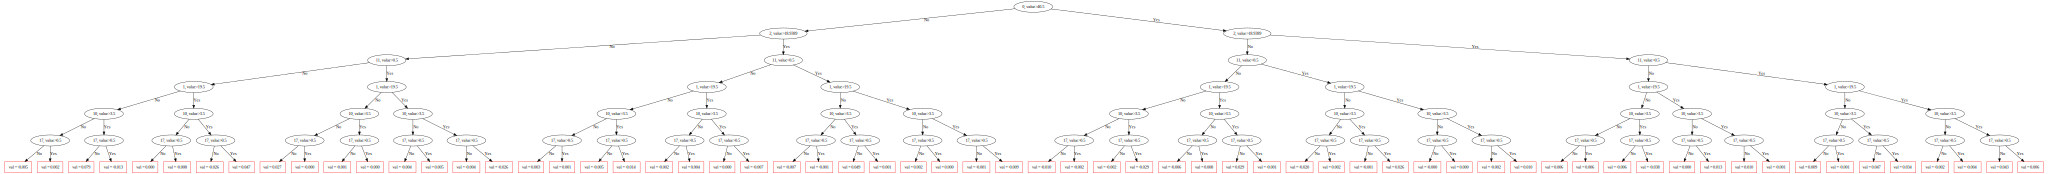

In [ ]:
model.plot_tree(999,)

In [ ]:
res = pd.DataFrame(predictions)
res.index = test_new.index
res.columns = ["prediction"]
res.to_csv("prediction_results_HP.csv")

In [ ]:
from google.colab import files
files.download('prediction_results_HP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>